In [1]:
from matplotlib import pyplot as plt
from funciones import *
import numpy as np
import tqdm

import pandas as pd
import seaborn

In [2]:
def casimir_fuerza(y):
    delta_y2 = ((y.max(axis = 1) - y.min(axis = 1))**2).mean()
    return - delta_y2 / (8* (np.pi))

def casimir_error(y):
    delta_y2 = ((y.max(axis = 1) - y.min(axis = 1))**2).std()
    return - delta_y2 / (8* (np.pi))

F_teorica_a2 = -np.pi / (24)

In [3]:
divisiones_n_loops = 3
divisiones_N = 8

N = []
for val in np.logspace(2,4,divisiones_N):
    N.append([val]*divisiones_n_loops)
    
N = np.array(N).flatten()
n_lines = [100,1000,10000]*divisiones_N

In [4]:
results = []
errores = []

for n_lines_, N_ in tqdm.tqdm(zip(n_lines, N)):
    n_lines_ = int(n_lines_)
    N_ = int(N_)
    
    y = generar_lineas(n_lines =n_lines_, N = N_, y0 = 0, yN = 0)
    
    
    results.append((n_lines_, N_, casimir_fuerza(y),casimir_error(y)))

results = np.array(results)

24it [00:16,  1.44it/s]


In [5]:
df = pd.DataFrame(results, columns = ('n_lines','N','val','std'))

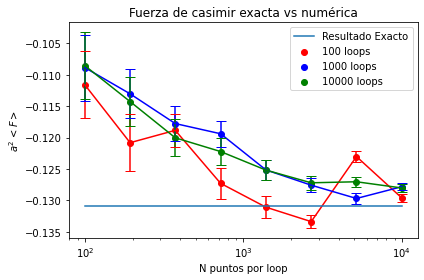

In [8]:
for n_loops,c  in zip([100,1000,10000],['r','b','g']):

    df_aux = df.loc[df['n_lines'] == n_loops]
    
    plt.plot(df_aux['N'], 
             df_aux['val'], 
#              label = '{} loops'.format(n_loops), 
             c = c)
    
    plt.scatter(df_aux['N'], 
             df_aux['val'], 
             label = '{} loops'.format(n_loops), 
             c = c)
    
    plt.errorbar(df_aux['N'].values, 
                 df_aux['val'].values, 
                 yerr = df_aux['std'] / df_aux['N']**0.5, 
                 fmt = 'none',
                 c = c,
                capsize = 5)
    
plt.plot([100,10000],[-np.pi / 24,-np.pi / 24], label = 'Resultado Exacto')
    
plt.xscale('log')

plt.legend(bbox_to_anchor=(1,1), loc="upper right")

plt.title('Fuerza de casimir exacta vs numérica')
plt.ylabel('$ a^2 \, <F>$')
plt.xlabel('N puntos por loop')

plt.tight_layout()

plt.savefig('convergencia.pdf')